In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2022-10-18 16:57:21--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.1’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.04s   

2022-10-18 16:57:22 (1.04 MB/s) - ‘daily-bike-share.csv.1’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [12]:
bike_data.info()
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


#### Select columns based on their dtypes

In [13]:
bike_data.select_dtypes('object')  #select based on data types

,dteday
0,1/1/2011
1,1/2/2011
2,1/3/2011
3,1/4/2011
4,1/5/2011
...,...
726,12/27/2012
727,12/28/2012
728,12/29/2012
729,12/30/2012


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'rentals')

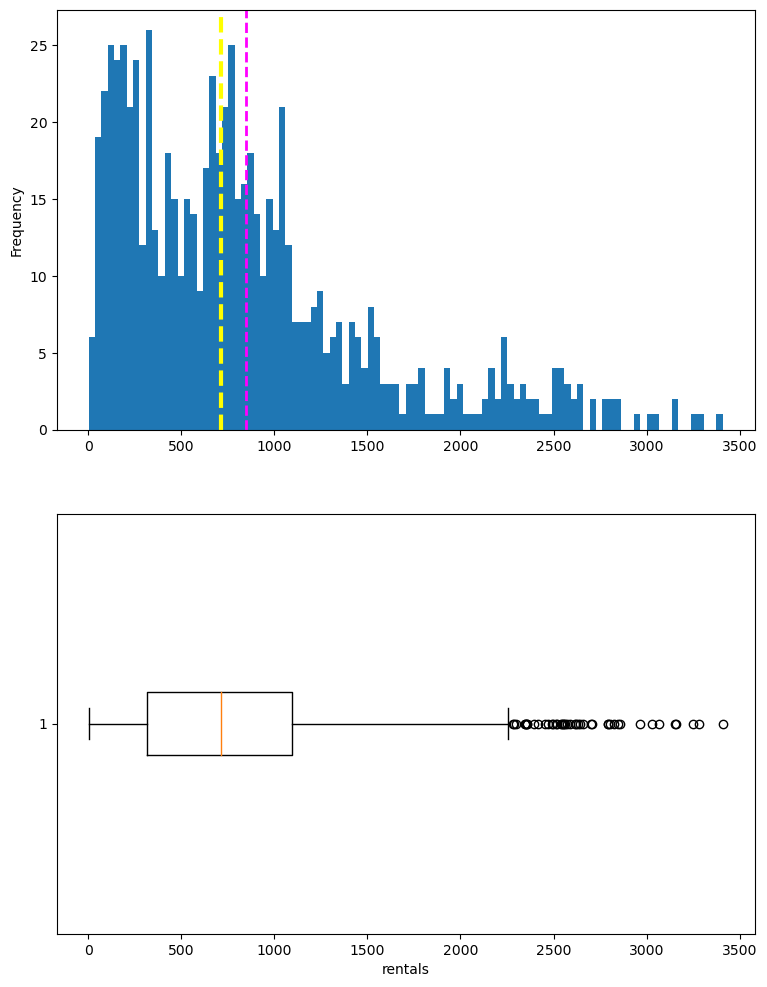

In [15]:
from cProfile import label


label = bike_data['rentals']

#create a figure for 2 subplots(2 rows, and 1 column)

fig, ax = plt.subplots(2,1, figsize = (9,12))

#plot the histogram

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

#add lines for mean median and mode

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth = 2)

ax[0].axvline(label.median(), color='yellow', linestyle='dashed', linewidth = 3)


#plot the boxplot

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('rentals')

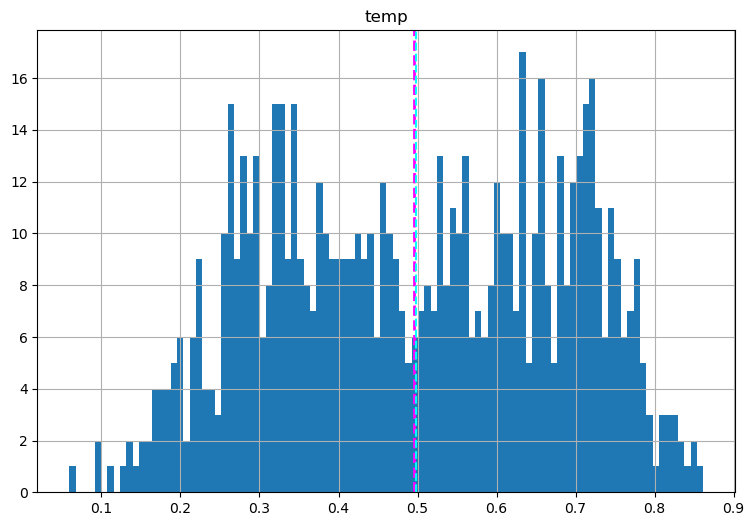

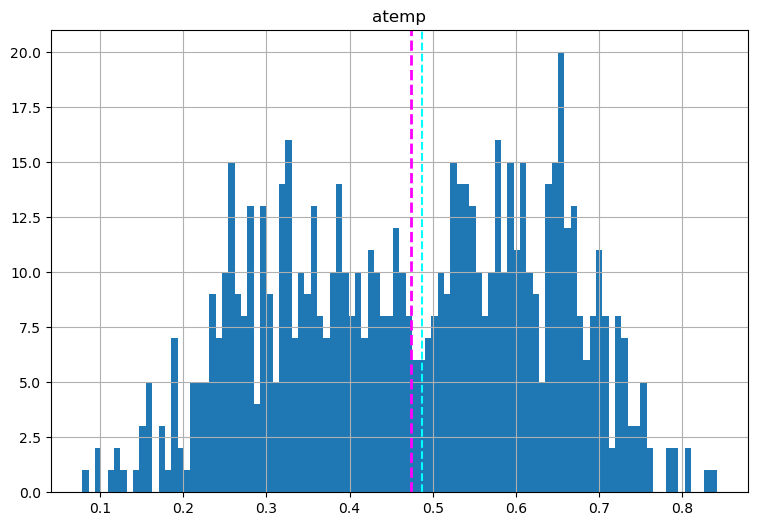

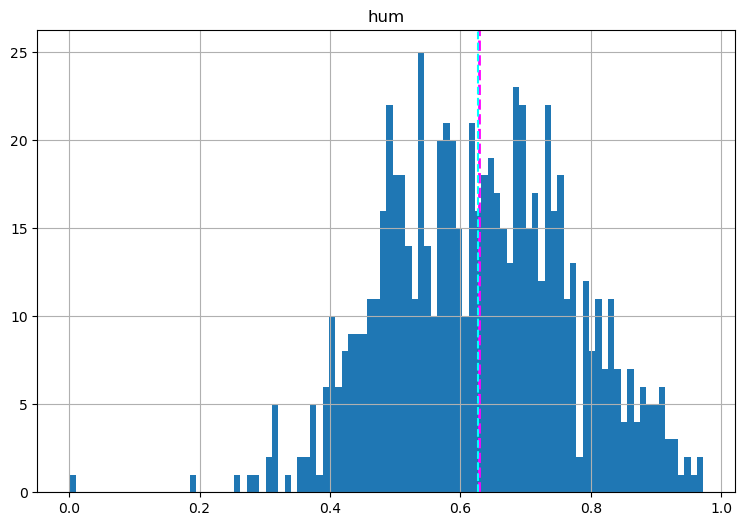

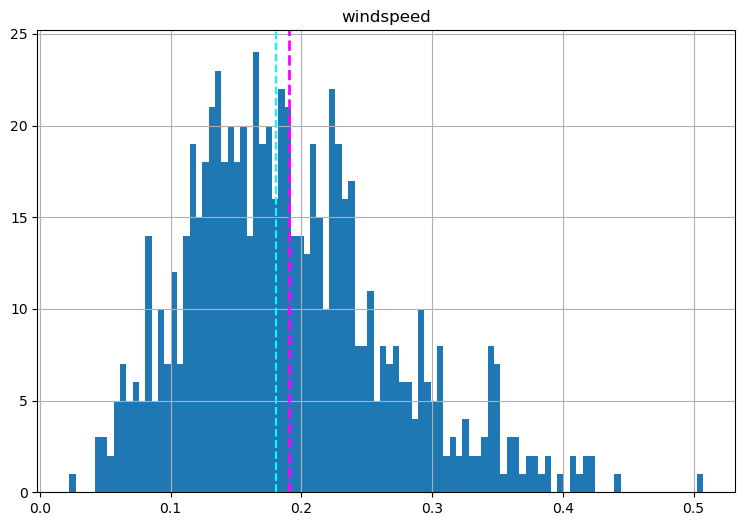

In [19]:
#plot a histogram for each numeric feature


numeric_features= ['temp', 'atemp', 'hum', 'windspeed']
for col in numeric_features:
    fig = plt.figure(figsize =(9, 6))
    ax = plt.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed')
    ax.set_title(col)

In [17]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

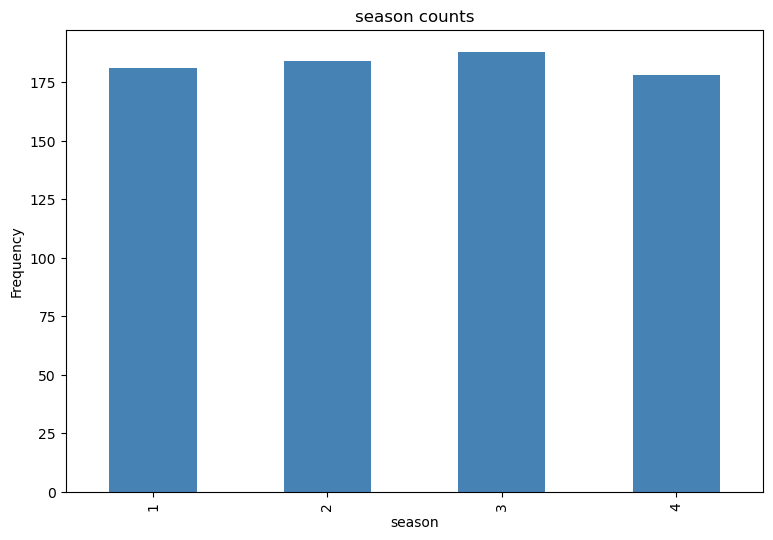

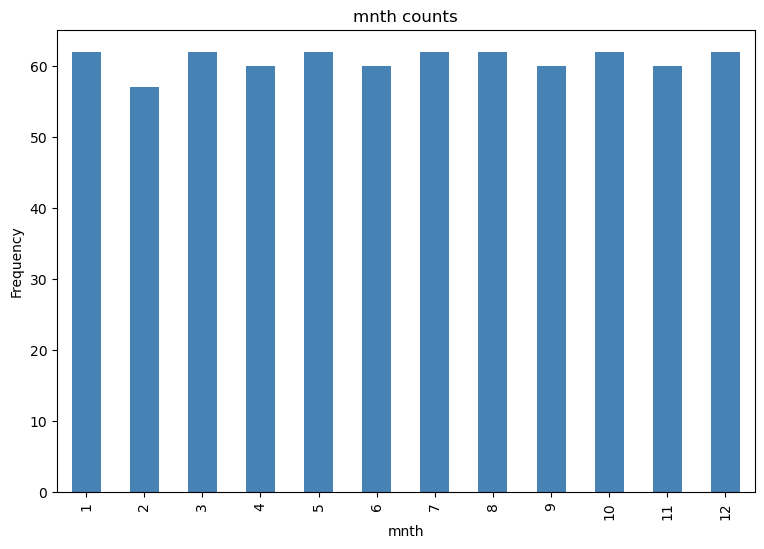

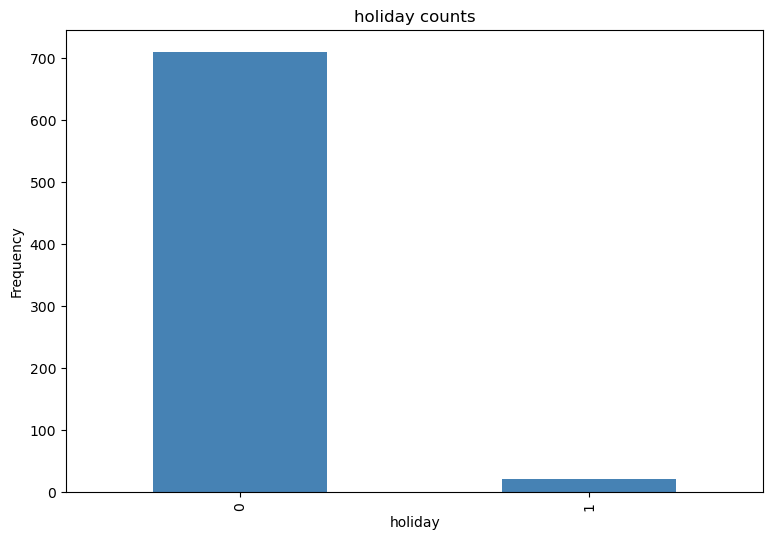

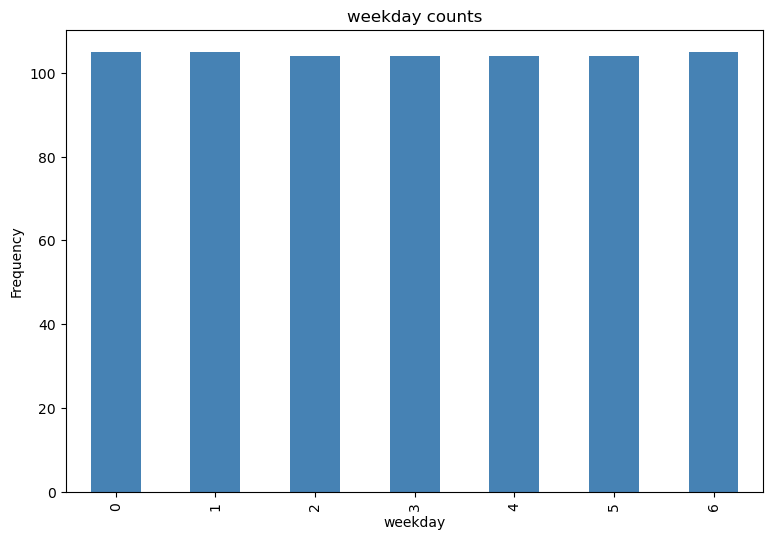

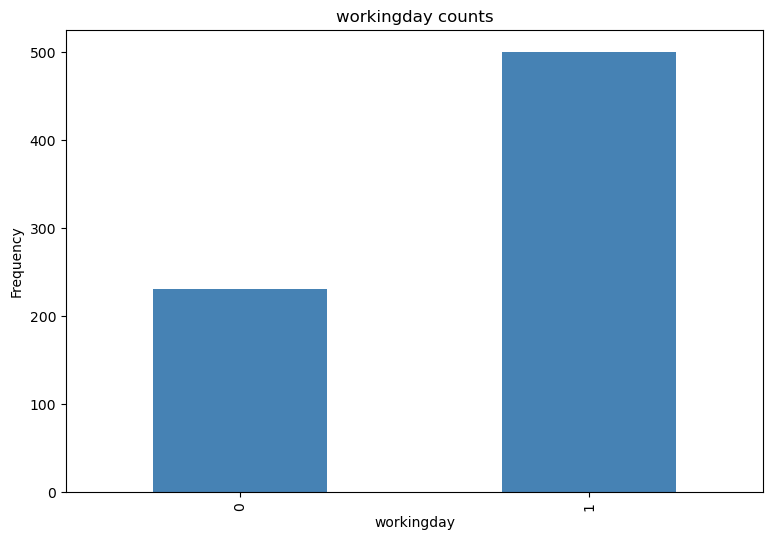

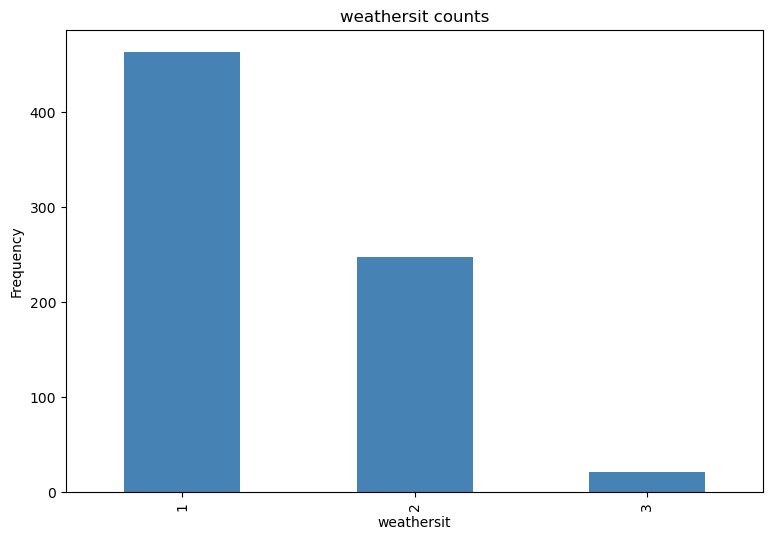

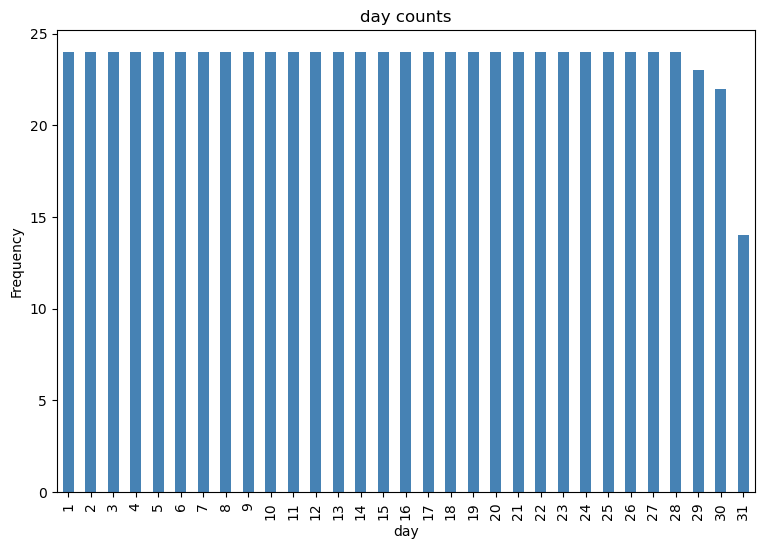

In [18]:
for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

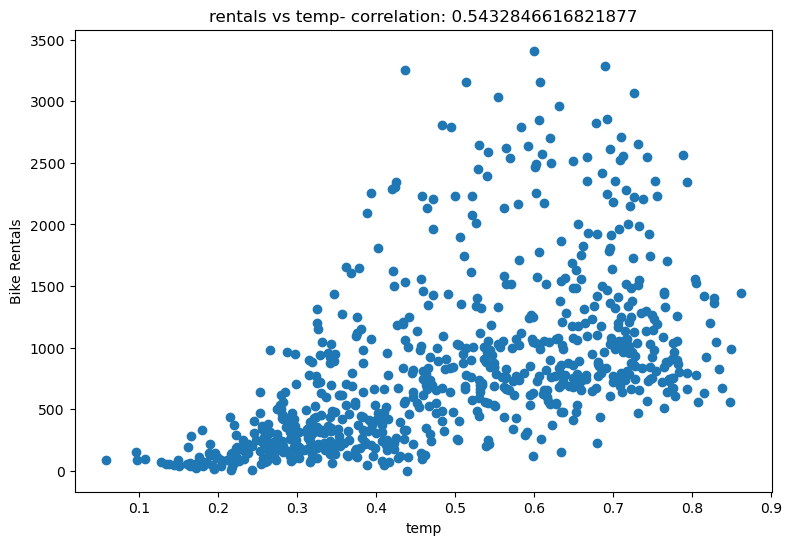

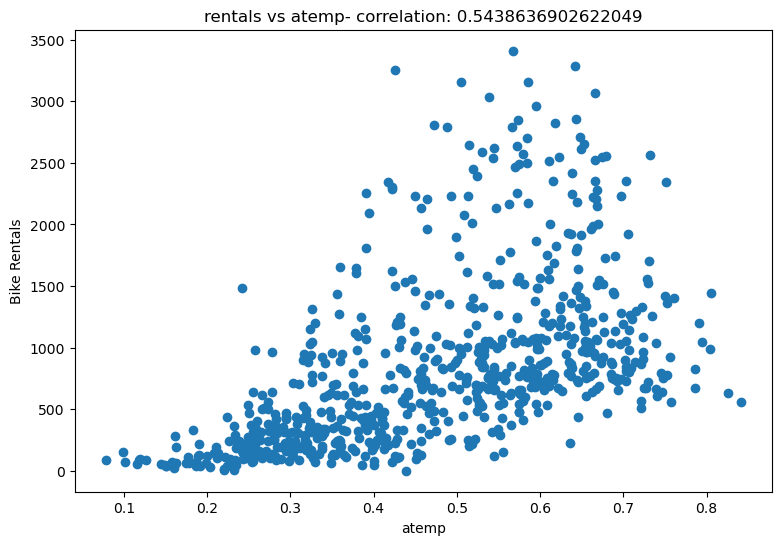

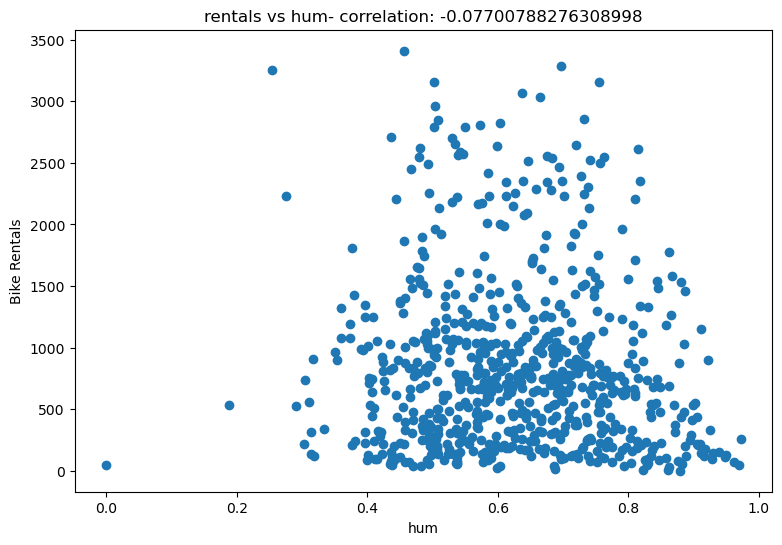

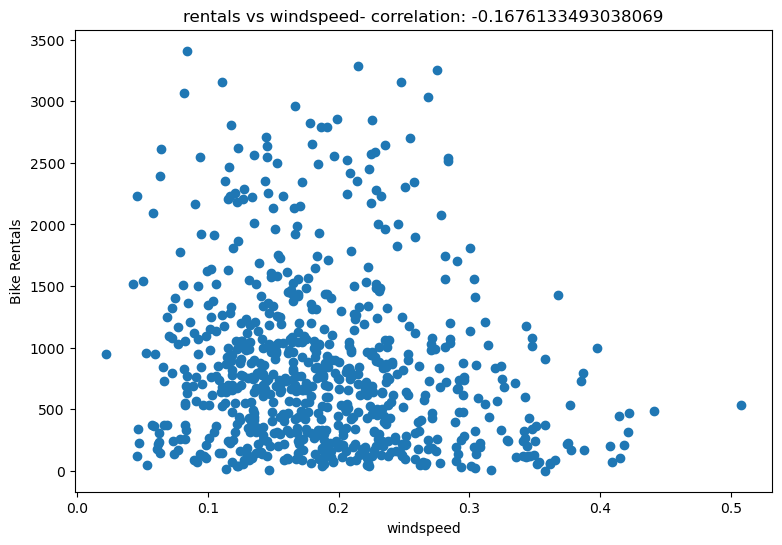

In [20]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title('rentals vs ' + col + '- correlation: ' + str(correlation))
plt.show()

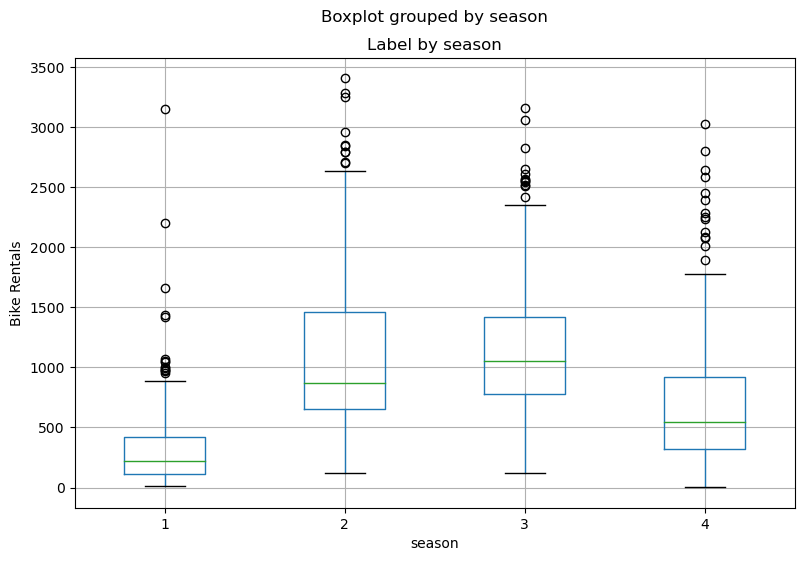

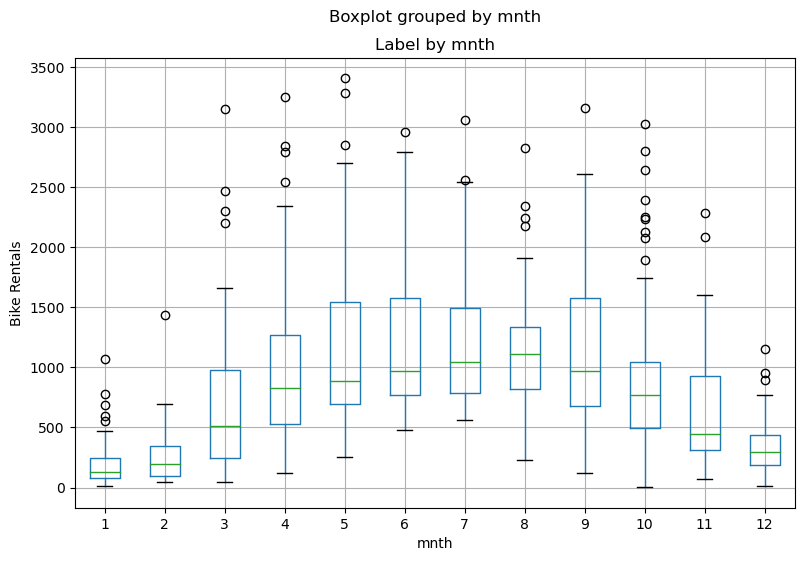

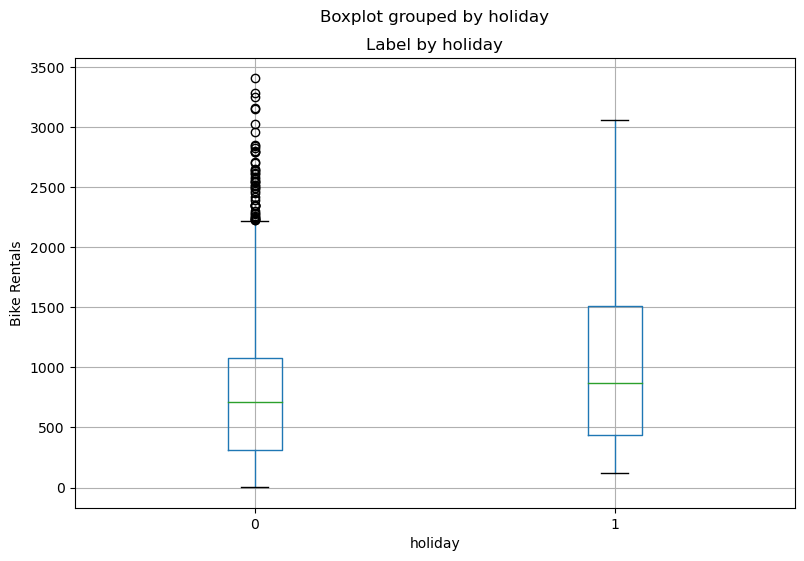

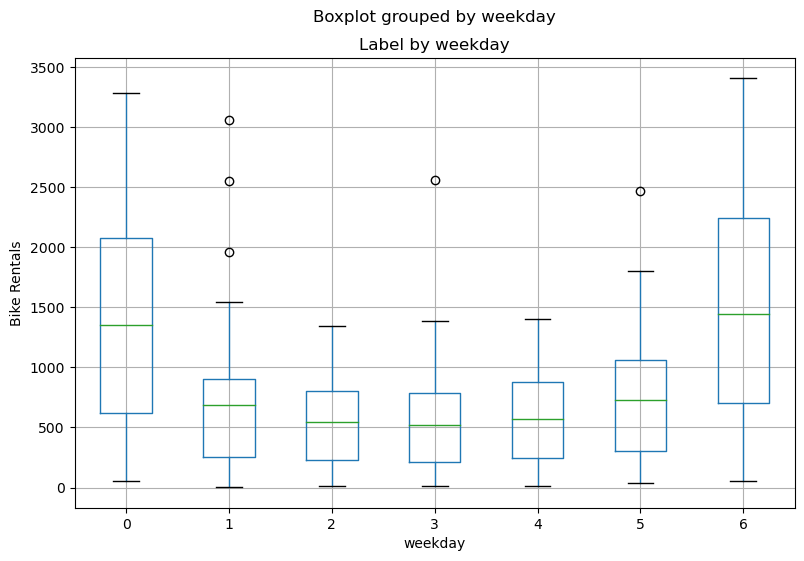

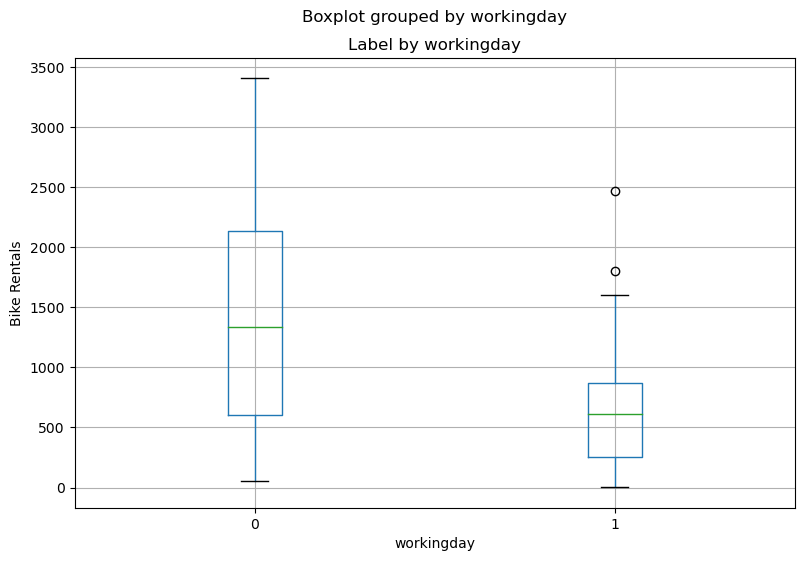

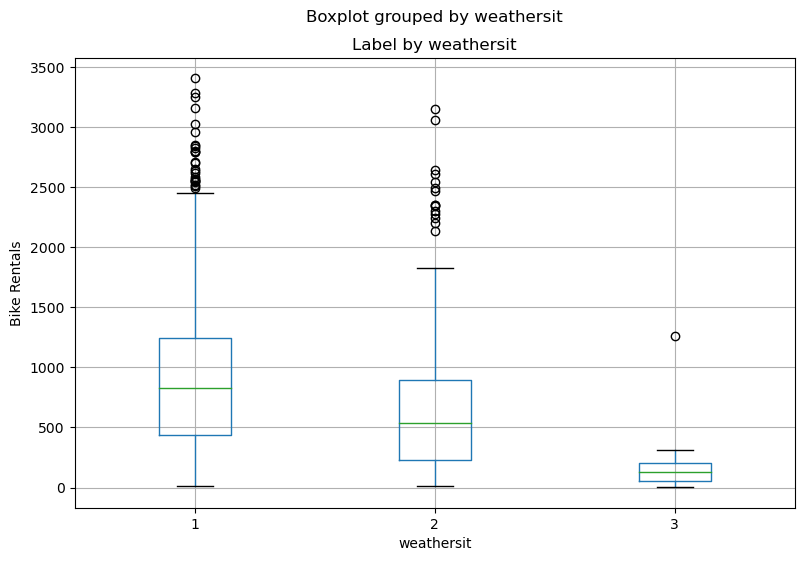

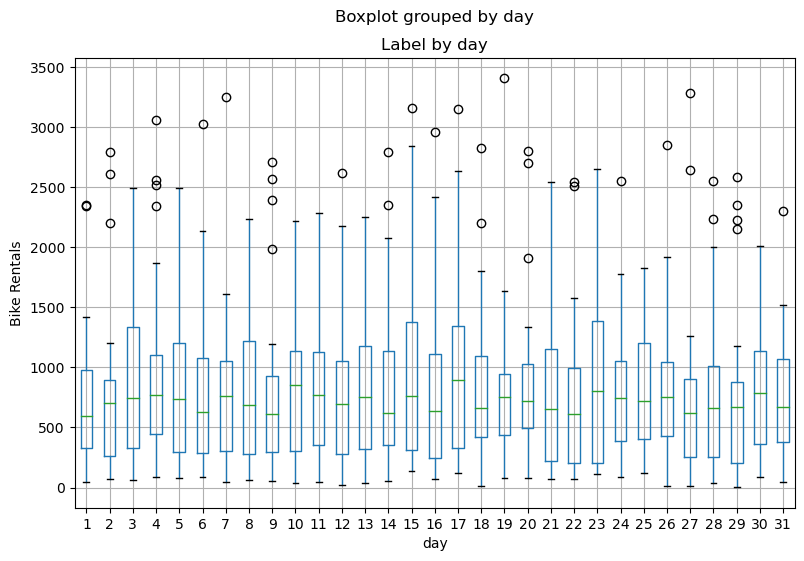

In [21]:
#compare categorical features with the label
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

In [22]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

In [30]:
bike_data.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(test_size=0.2, random_state=54)

In [33]:
for train_index, test_index in split.split(bike_data, bike_data['season']):
    train_set = bike_data.iloc[train_index]
    test_set = bike_data.iloc[test_index]

In [126]:
train_set

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
106,107,4/17/2011,2,0,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496,1558,17
29,30,1/30/2011,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,30
219,220,8/8/2011,3,0,8,0,1,1,1,0.765000,0.703283,0.592083,0.192175,846,8
571,572,7/25/2012,3,1,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800,1383,25
383,384,1/19/2012,1,1,1,0,4,1,1,0.190000,0.190038,0.497500,0.220158,130,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,3/9/2011,1,0,3,0,3,1,2,0.295833,0.286608,0.775417,0.220150,191,9
114,115,4/25/2011,2,0,4,0,1,1,1,0.606667,0.574500,0.776667,0.185333,773,25
695,696,11/26/2012,4,1,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650,337,26
99,100,4/10/2011,2,0,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767,1188,10


In [129]:
train_x = train_set[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']]
train_y = train_set['rentals']

In [130]:
train_x

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
106,2,4,0,0,0,1,0.456667,0.445696,0.479583,0.303496
29,1,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983
219,3,8,0,1,1,1,0.765000,0.703283,0.592083,0.192175
571,3,7,0,3,1,1,0.724167,0.654054,0.450000,0.164800
383,1,1,0,4,1,1,0.190000,0.190038,0.497500,0.220158
...,...,...,...,...,...,...,...,...,...,...
67,1,3,0,3,1,2,0.295833,0.286608,0.775417,0.220150
114,2,4,0,1,1,1,0.606667,0.574500,0.776667,0.185333
695,4,11,0,1,1,1,0.313333,0.339004,0.535417,0.046650
99,2,4,0,0,0,2,0.426667,0.426737,0.857500,0.146767


In [131]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [132]:
train_x_std = std.fit_transform(train_x)

In [133]:
train_x_std

array([[-0.44568685, -0.72298637, -0.16783627, ..., -0.18901025,
        -1.05191665,  1.47411492],
       [-1.34631356, -1.58938316, -0.16783627, ..., -1.39804178,
         0.63922544, -1.49068915],
       [ 0.45493986,  0.43220936, -0.16783627, ...,  1.40501356,
        -0.26766049,  0.03609451],
       ...,
       [ 1.35556657,  1.29860616, -0.16783627, ..., -0.84925159,
        -0.66268857, -1.84376572],
       [-0.44568685, -0.72298637, -0.16783627, ..., -0.30633409,
         1.58260543, -0.55047614],
       [ 0.45493986,  0.14341043, -0.16783627, ...,  0.90897238,
         0.92034468, -1.23313183]])

In [135]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x_std, train_y)

LinearRegression()

In [136]:

test_X = test_set[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']]

test_y = test_set['rentals']

In [137]:
test_X

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
303,4,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350
346,4,12,0,2,1,1,0.282500,0.301138,0.590000,0.140550
304,4,11,0,2,1,1,0.400833,0.397088,0.683750,0.135571
266,4,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383
75,1,3,0,4,1,1,0.415000,0.410333,0.602917,0.209579
...,...,...,...,...,...,...,...,...,...,...
715,4,12,0,0,0,2,0.362500,0.369938,0.838750,0.100742
666,4,10,0,0,0,2,0.477500,0.467771,0.694583,0.398008
244,3,9,0,5,1,2,0.643333,0.604808,0.727083,0.139929
69,1,3,0,5,1,2,0.316522,0.305000,0.649565,0.232970


In [138]:
test_X_std = std.fit_transform(test_X)

In [139]:
lr.fit(train_x_std, train_y)

LinearRegression()

In [143]:
pred = lr.predict(test_X_std)

In [146]:
pred[:10]

array([ 439.8793159 ,  359.79727618,  515.22821534, 1752.96574654,
        523.23468618,  270.92392957, 1172.25117194,  560.09808033,
       -402.57723271,  339.87353093])

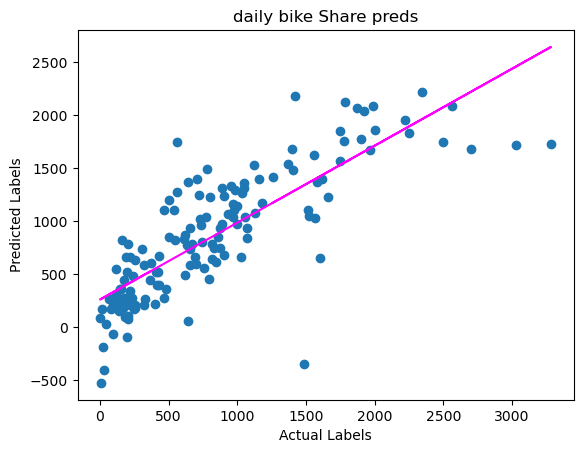

In [149]:
plt.scatter(test_y, pred)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('daily bike Share preds')

#overlay the regression line

z = np.polyfit(test_y, pred, 1)
p = np.poly1d(z)
plt.plot(test_y,p(test_y), color='magenta')
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'rmse is {np.sqrt(mean_squared_error(test_y, pred))}')

rmse is 399.07729206618353


In [151]:
print(f'r2_score is {r2_score(test_y, pred)}')

r2_score is 0.6551249905039023
